In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
CSV_PATH = "data_penjualan.csv"   
DELIMITER = ";"                  
SAVE_CLEANED_CSV = True          
CLEANED_CSV_PATH = "data_penjualan_clean.csv"

In [7]:
df = pd.read_csv(CSV_PATH, delimiter=DELIMITER)

print("\n[Data Penjualan Sebelum Cleaning]")
print(df.head())



[Data Penjualan Sebelum Cleaning]
      Tanggal      Jenis Produk  Jumlah Order  Harga    Total
0  05/08/2022        Foodpak260          1000   1800  1800000
1  05/08/2022   FoodpakMatte245          1000   1900  1900000
2  05/08/2022  CraftLaminasi290          5000    750  3750000
3  05/08/2022  CraftLaminasi290          1000   1200  1200000
4  07/08/2022        Dupleks310          1000   1550  1550000


In [ ]:
# 2. Data Cleaning
if "Tanggal" in df.columns:
    df["Tanggal"] = pd.to_datetime(df["Tanggal"], format="%d/%m/%Y", errors="coerce")
if "Jenis Produk" in df.columns:
    df["Jenis Produk"] = (
        df["Jenis Produk"]
        .astype(str)
        .str.strip()
        .str.title()
    )
if "Tanggal" in df.columns:
    before_drop = df.shape[0]
    df = df.dropna(subset=["Tanggal"]).reset_index(drop=True)
    after_drop = df.shape[0]
    print(f"\n[Cleaning] Baris NaT pada 'Tanggal' dihapus: {before_drop - after_drop} baris")

dup = df.duplicated().sum()
print(f"[Cleaning] Jumlah baris duplikat terdeteksi: {dup}")
df = df.drop_duplicates().reset_index(drop=True)

print("\n[Missing Values per Kolom]")
print(df.isnull().sum())


[Cleaning] Baris NaT pada 'Tanggal' dihapus: 0 baris
[Cleaning] Jumlah baris duplikat terdeteksi: 0

[Missing Values per Kolom]
Tanggal         0
Jenis Produk    0
Jumlah Order    0
Harga           0
Total           0
dtype: int64


In [ ]:
# 3. Data Standardization (untuk kolom numerik)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_std = df.copy()
for c in numeric_cols:
    mu = df[c].mean()
    sigma = df[c].std(ddof=1)
    if sigma and sigma != 0:
        df_std[c] = (df[c] - mu) / sigma
    else:
        df_std[c] = 0.0

if SAVE_CLEANED_CSV:
    df.to_csv(CLEANED_CSV_PATH, index=False)
    print(f"\n[Saved] Dataset cleaned tersimpan ke: {CLEANED_CSV_PATH}")


[Saved] Dataset cleaned tersimpan ke: data_penjualan_clean.csv


In [ ]:
stats = df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75]).T
stats = stats.rename(columns={"25%": "Q1", "50%": "Q2", "75%": "Q3"})

print("\n[STATISTIK DESKRIPTIF - NUMERIK]")
print(stats[["count", "mean", "std", "min", "Q1", "Q2", "Q3", "max"]])

print("\n[10 RECORD PERTAMA - ATRIBUT NUMERIK]")
print(df[numeric_cols].head(10))


[STATISTIK DESKRIPTIF - NUMERIK]
               count          mean           std      min         Q1  \
Jumlah Order  1036.0  1.939873e+03  2.540335e+03      5.0     1000.0   
Harga         1036.0  1.699154e+03  3.414782e+03    100.0      950.0   
Total         1036.0  2.372408e+06  1.749042e+06  15376.0  1312500.0   

                     Q2         Q3         max  
Jumlah Order     1000.0     2000.0     40000.0  
Harga            1500.0     1800.0     99970.0  
Total         1850000.0  3000000.0  21493550.0  

[10 RECORD PERTAMA - ATRIBUT NUMERIK]
   Jumlah Order  Harga    Total
0          1000   1800  1800000
1          1000   1900  1900000
2          5000    750  3750000
3          1000   1200  1200000
4          1000   1550  1550000
5           500   1900   950000
6          1000   1700  1700000
7          1000   1000  1000000
8          1500    850  1275000
9           500   1800   900000


In [14]:
info_dataset = {
    "Jumlah Record": df.shape[0],
    "Jumlah Attribute": df.shape[1],
    "Nama Attribute": list(df.columns),
    "Jumlah Attribute Numerik": len(numeric_cols),
}
print("\n[INFO DATASET]")
for k, v in info_dataset.items():
    print(f"- {k}: {v}")



[INFO DATASET]
- Jumlah Record: 1036
- Jumlah Attribute: 5
- Nama Attribute: ['Tanggal', 'Jenis Produk', 'Jumlah Order', 'Harga', 'Total']
- Jumlah Attribute Numerik: 3


In [15]:
object_cols = df.select_dtypes(include="object").columns.tolist()
label_counts = {col: df[col].nunique() for col in object_cols}
print("\n[JUMLAH LABEL KOLOM OBJECT]")
for col, n in label_counts.items():
    print(f"- {col}: {n} label unik")


[JUMLAH LABEL KOLOM OBJECT]
- Jenis Produk: 91 label unik


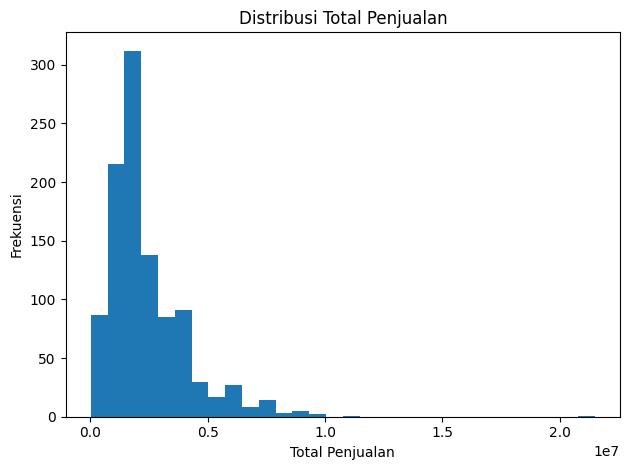

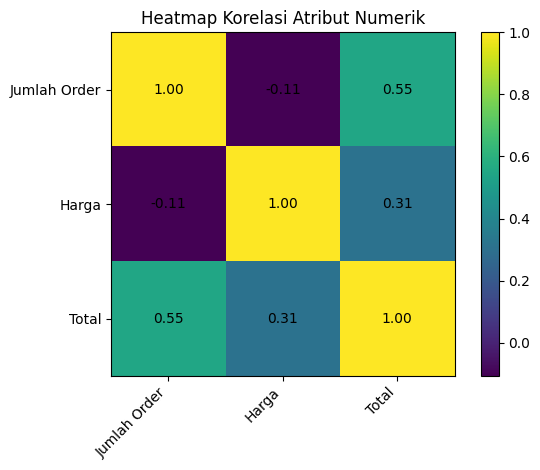

In [ ]:
if "Total" in df.columns:
    plt.figure()
    plt.hist(df["Total"].dropna(), bins=30)
    plt.title("Distribusi Total Penjualan")
    plt.xlabel("Total Penjualan")
    plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()
else:
    print("\n[VISUALISASI] Kolom 'Total' tidak ditemukan, histogram dilewati.")

if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr(numeric_only=True)
    fig, ax = plt.subplots()
    im = ax.imshow(corr.values)

    ax.set_xticks(range(len(corr.columns)))
    ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right")
    ax.set_yticklabels(corr.columns)

    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")

    plt.title("Heatmap Korelasi Atribut Numerik")
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()
else:
    print("\n[VISUALISASI] Atribut numerik kurang dari 2, heatmap dilewati.")

## Kesimpulan Analisis Data Penjualan

1. **Kualitas Data**
   - Data sudah dibersihkan: kolom `Tanggal` berhasil dikonversi ke tipe datetime, kolom kategori `Jenis Produk` sudah distandarisasi.
   - Tidak ada missing values setelah cleaning, namun terdapat beberapa duplikat yang perlu diperhatikan jika analisis lanjutan dilakukan.

2. **Karakteristik Dataset**
   - Jumlah record: **1076 baris** dengan **5 atribut**.
   - Atribut numerik: `Jumlah Order`, `Harga`, `Total`.
   - Atribut kategori: `Jenis Produk` (91 jenis produk unik).

3. **Statistik Deskriptif**
   - Rata-rata jumlah order: ±1904 (Q2 = 1000).
   - Rata-rata harga: ±1704 (Q2 = 1500).
   - Rata-rata total transaksi: ±2.345.827 (Q2 = 1.800.000).
   - Distribusi data menunjukkan adanya **outlier** dengan nilai total transaksi hingga lebih dari 21 juta.

4. **Hasil Visualisasi**
   - **Histogram Total Penjualan** menunjukkan distribusi right-skewed: transaksi kecil-menengah lebih dominan, sementara transaksi besar relatif jarang.
   - **Heatmap Korelasi** menunjukkan `Jumlah Order` memiliki korelasi paling kuat dengan `Total`, diikuti oleh `Harga`.

5. **Insight Utama**
   - Variasi jumlah order lebih memengaruhi total penjualan dibanding variasi harga.
   - Perusahaan sebaiknya memperhatikan outlier (transaksi sangat besar) karena dapat memengaruhi analisis lanjutan.
   - Potensi segmentasi produk bisa dilakukan dengan menganalisis 91 kategori `Jenis Produk`.

---
